In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,BatchNormalization,Flatten
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
from keras.datasets import fashion_mnist
data = fashion_mnist.load_data()

In [27]:
(X_train,y_train),(X_test,y_test) = data

In [28]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [29]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [30]:
print(X_train[7])
print(class_names[y_train[7]])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

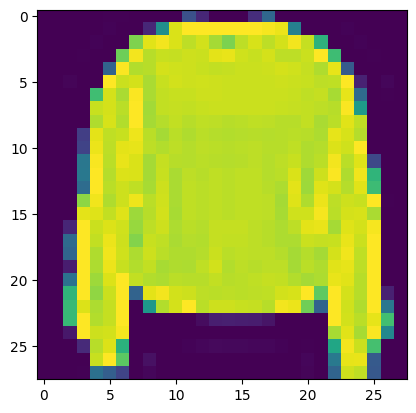

In [31]:
plt.imshow(X_train[7])

In [32]:
X_train.dtype

dtype('uint8')

In [33]:
X_train = X_train/255


In [34]:
X_test = X_test/255

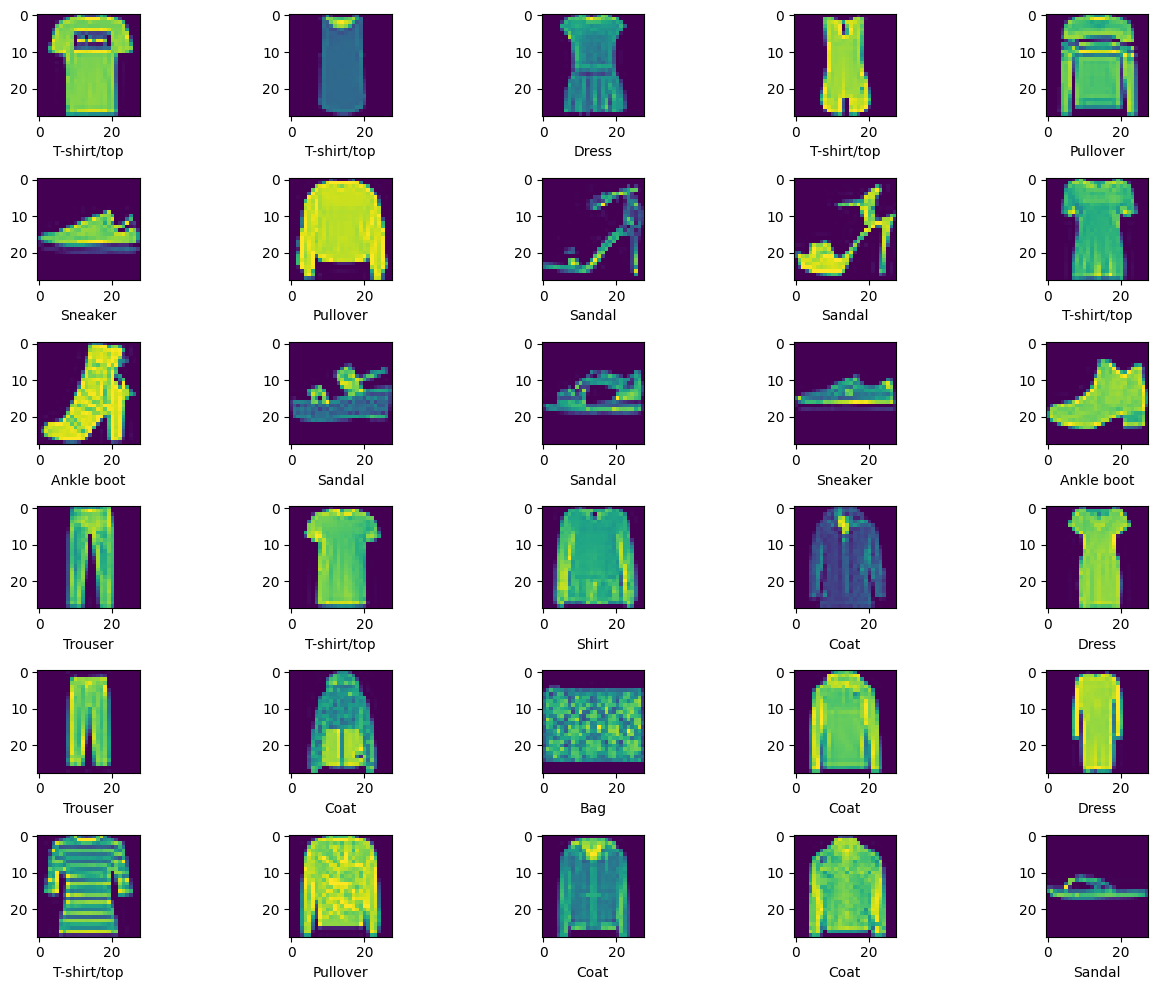

In [43]:
plt.figure(figsize = (15,10))


for i in range(1,31):
    plt.subplot(6,5,i)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
    plt.tight_layout()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_train_valid,y_train,y_train_valid = train_test_split(X_train,y_train,test_size = 0.2)

In [51]:
model = keras.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(300,activation ="relu"),
    Dense(100,activation ="relu"),
    Dense(10,activation ="softmax")
])

C:\Users\Shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [58]:
model.fit(X_train,y_train,epochs = 10,validation_data = (X_train_valid,y_train_valid))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7817 - loss: 0.6202 - val_accuracy: 0.8571 - val_loss: 0.3956
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8634 - loss: 0.3733 - val_accuracy: 0.8678 - val_loss: 0.3484
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8745 - loss: 0.3386 - val_accuracy: 0.8683 - val_loss: 0.3514
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 0.3088 - val_accuracy: 0.8727 - val_loss: 0.3383
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.2888 - val_accuracy: 0.8869 - val_loss: 0.3073
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8982 - loss: 0.2726 - val_accuracy: 0.8823 - val_loss: 0.3135
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9035 - loss: 0.2584 - val_accuracy: 0.8887 - val_loss: 0.2957
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9072 - loss: 0.2450 - 

In [59]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8777 - loss: 0.3447


[0.34761229157447815, 0.876800000667572]

In [65]:
model.predict(X_train[:3]).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.  , 0.  , 0.88, 0.  , 0.04, 0.  , 0.08, 0.  , 0.  , 0.  ],
       [0.86, 0.  , 0.01, 0.  , 0.  , 0.  , 0.14, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.94]],
      dtype=float32)